In [1]:
import pandas as pd
import numpy as np
import thinkplot
import thinkstats2
import math

In [2]:
#Load data, loose the excess
df = pd.read_csv('MSFT.csv')
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2018-01-01,88.190002
1,2018-01-08,89.599998
2,2018-01-15,90.000000
3,2018-01-22,94.059998
4,2018-01-29,91.779999


In [3]:
#Do a little manipulation to get the return
df['diff'] = pd.Series(np.diff(df['Close']))
df['return'] = df['diff']/df['Close']
df = df[['Date', 'return']].dropna()
df.head()

,Date,return
0,2018-01-01,0.015988
1,2018-01-08,0.004464
2,2018-01-15,0.045111
3,2018-01-22,-0.024240
4,2018-01-29,-0.039224


Our new table is the daily return - i.e. if we invested in MSFT one day, what would the return be from my investment from one day to the next. 

The first two days can be taken as an example:
    - From day 1 to day 2 the price goes up apx $1.4
    - $1.4 dollars is approximately 1.6% of the first day price - ~$88
    - So if you invested on day one, you'd gain about 1.6%, or .016 <- That's the return value. 

We can do some of our graphing to take a little look-see and try to determine if this new distribution is normal:

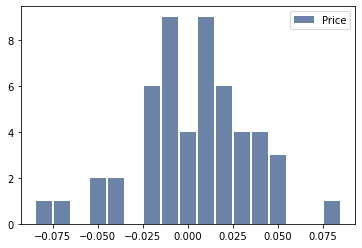

In [4]:
#Histogram
hi = thinkstats2.Hist(round(df["return"], 2), label="Price")
thinkplot.Hist(hi)
thinkplot.Config()

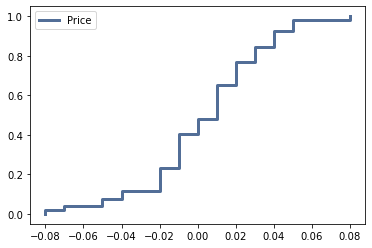

In [5]:
#CDF look
hi_c = thinkstats2.Cdf(hi)
thinkplot.Cdf(hi_c)
thinkplot.Config()

These charts look semi-normal, but not totally. Examine the probability plot to see it a bit closer. 

The thinkstats2 file provides this easy to use probability plot function. The book (pg 63ish) has the steps to make this broken out a little bit more. 

The most simple way I can think of to explain it is that it compares if the middle values are near the mean, the low values are near the low, and the high values are near the high. The model line is what we'd expect if the data was perfectly normal, in this one the middle values are close, the low values are a little lower than expected, the high values are a little lower than expected. 

In English, it is more or less normal for values close to the mean, but the values (the actual % return values) on either end of the distribution are a bit lower than we'd expect if it was normal. 

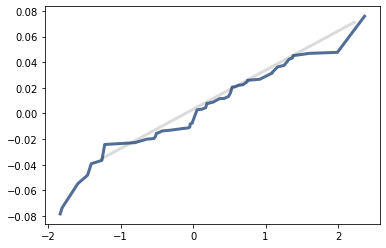

In [26]:
#Create probability plot
thinkstats2.NormalProbabilityPlot(df["return"])
# x axis is standard deviation
# y axis is actual values


Does it match the line? Is it normal? Ehhhhh.... kind of. The highest and lowest values are both lower than expected. For values near the mean, it is pretty close. 

We can live on the wild side, assume that it is close enough to normal, and 'use' that normality to do some stuff. 

One of the super useful things about these analytical distributions is the simplicity. A normal curve is always the same basic shape, so all we need to do to create one is to know the mean (mu) and standard deviation (sigma). This allows us to easily extrapolate from what we know, and use all the attributes of the normal distribution. Again, this is an approximation, it is not bang on, but that is useful in a lot of cases. 

In [7]:
#Create a normal distribution based on the characteristics of the kinda-normal data
import scipy.stats
mu = df["return"].mean()
sigma = df["return"].std()
normz = scipy.stats.norm(mu, sigma)

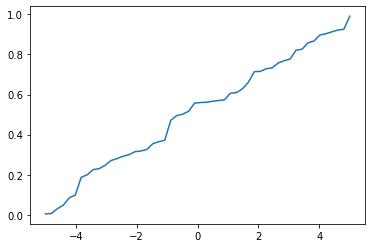

In [8]:
import matplotlib.pyplot as plt
data = np.sort(df["return"])
x = np.linspace(-5,5, 52)
plt.plot(x,normz.cdf(data))
plt.show()

In [9]:
#How many daily returns are greater than .5%, but less than 1%?
lowVal = normz.cdf(.05)
hiVal = normz.cdf(.1)
print(str(lowVal) + " : " + str(hiVal))

0.9355110908938288 : 0.9991544890514654


In [10]:
#Check Normality with code
k2, p = scipy.stats.normaltest(df["return"])
p

0.23901164802625616

In [11]:
#If we were to write out our decision....
alpha = .05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


Now try one. 
    - Check and see if NFL weights data fits a normal dist.
    - Create a normal analytical distribution based off of the emperical data.
    - What percentage of people are between 265 and 325? Using the empirical?
    - Using the analytical?
    - What percentage of people are greater than your weight, using both distributions?
If you're fast, try with NBA Weights

We can try another one - lognormal

We will look at the salary distribution of people in Spain.

In [12]:
#Load and preview data
dfSP = pd.read_csv("spain_salary.csv")
dfSP.head()

,year,state,gender,statistic,gross_income_euros
0,2017,nationwide,both,mean,23646.50
1,2016,nationwide,both,mean,23156.34
2,2015,nationwide,both,mean,23106.30
3,2014,nationwide,both,mean,22858.17
4,2013,nationwide,both,mean,22697.86


In [13]:
#I'm going to extract the income into a Pandas Series. This is a 1D data structure
#Not much differs in using it, but we should see it, it is common
dfSP = dfSP[dfSP["statistic"] == "mean"]
spinc = pd.Series(dfSP["gross_income_euros"])
spinc

0       23646.50
1       23156.34
2       23106.30
3       22858.17
4       22697.86
          ...   
3185    23097.08
3186    23512.09
3187    23641.44
3188    23240.00
3189    22549.68
Name: gross_income_euros, Length: 540, dtype: float64

Do some basic preview stuff for a few cells....

In [14]:
spinc.describe()

count      540.000000
mean     21865.320611
std       3217.149924
min      16020.200000
25%      19344.052500
50%      21371.710000
75%      23773.370000
max      31618.970000
Name: gross_income_euros, dtype: float64

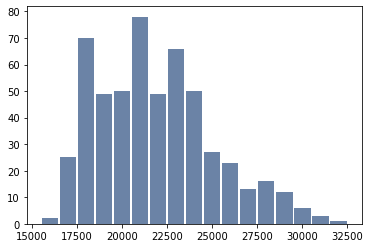

In [15]:
#Hist
histSP = thinkstats2.Hist(round(spinc, -3))
thinkplot.Hist(histSP)
thinkplot.Config()

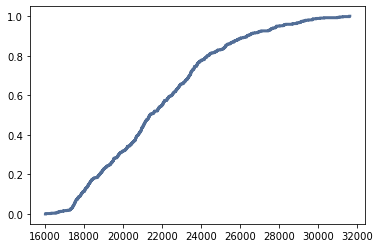

In [16]:
#CDF
cdfSP = thinkstats2.Cdf(spinc)
thinkplot.Cdf(cdfSP)
thinkplot.Config()

Ok, is it lognormal?

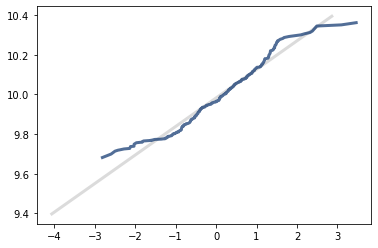

In [17]:
#Plot normal prob curve
thinkstats2.NormalProbabilityPlot(np.log(spinc))

How about normal?

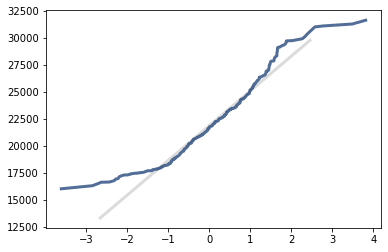

In [18]:
thinkstats2.NormalProbabilityPlot(spinc)

What do these mean? 

The lognormal looks to be slightly more accurate through the curve, it is probably a better representation.  


We can try another, maybe a Pareto 

In [19]:
df_fifa = pd.read_csv("fifa_eda.csv")
df_fifa = df_fifa[df_fifa["Wage"] > 0]
fifa = df_fifa["Wage"]
fifa.head()


0    565.0
1    405.0
2    290.0
3    260.0
4    355.0
Name: Wage, dtype: float64

In [20]:
fifa.describe()

count    17966.000000
mean         9.861850
std         22.117274
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        565.000000
Name: Wage, dtype: float64

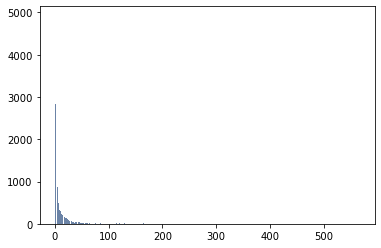

In [21]:
h = thinkstats2.Hist(fifa)
thinkplot.Hist(h)

{'xscale': 'linear', 'yscale': 'linear'}

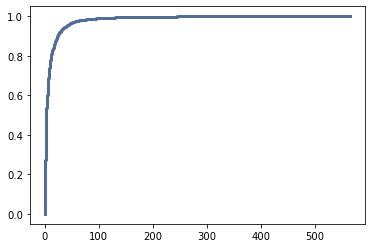

In [22]:
c = thinkstats2.Cdf(fifa)
thinkplot.Cdf(c)

Is it pareto?

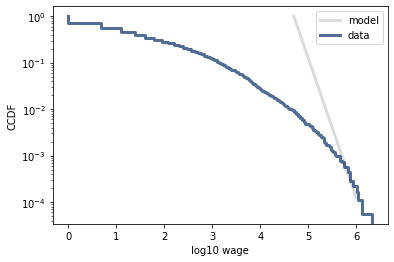

In [23]:
#Compare to pareto
log_wage = np.log(fifa)
cdf_log = thinkstats2.Cdf(log_wage)

xs, ys = thinkstats2.RenderParetoCdf(alpha=3, low=0, high=1e6, xmin=50000)
thinkplot.Plot(np.log10(xs), 1-ys, label="model", color=".8")
thinkplot.Cdf(cdf_log, complement=True, label="data") 
thinkplot.Config(xlabel='log10 wage',ylabel='CCDF',yscale='log')

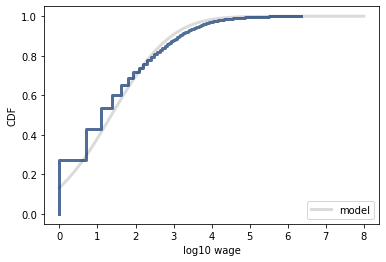

In [24]:
#Compare it to LogNormal
mu, sigma = log_wage.mean(), log_wage.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='0.8')
thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 wage', ylabel='CDF', loc='lower right')